In [23]:
# importing necessary libraries

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pylab as plt
import seaborn as sns

import dmba
from dmba import classificationSummary, gainsChart, liftChart, regressionSummary, stepwise_selection, plotDecisionTree
from dmba.metric import AIC_score, adjusted_r2_score, BIC_score


In [8]:
churn_df = pd.read_csv("C:/Users/steph/OneDrive/Documents/USD/ADS505/Data/churn_final.csv", index_col = 0)

In [10]:
churn_df.shape

(10000, 14)

In [11]:
# splitting into X and Y

X = churn_df.drop('churn', axis = 1)
y = churn_df['churn']

# partitioning data into 90% train and 10% test, and then will further split for validation

trainX, testX, trainy, testy = train_test_split(X, y, test_size = .1, random_state = 12345)

# using 80 / 20 split for train and validation set

trainX, validX, trainy, validy = train_test_split(trainX, trainy, test_size = .2, random_state = 12345)

In [14]:
print("Test set dimensions: ", testX.shape, 
      "\n Train set dimensions: ", trainX.shape,
      "\n Validation set dimension: ", validX.shape)

Test set dimensions:  (1000, 13) 
 Train set dimensions:  (7200, 13) 
 Validation set dimension:  (1800, 13)


In [17]:
# first, k-nn

# Train a classifier for different values of k
knn_results = []
for k in range(1, 25, 2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(trainX, trainy)
    knn_results.append({
        'k': k,
        'accuracy': accuracy_score(validy, knn.predict(validX)),
        'precision': precision_score(validy, knn.predict(validX)),
        'f1_score': f1_score(validy, knn.predict(validX))
    })

# Convert results to a pandas data frame
knn_results = pd.DataFrame(knn_results)

Text(0, 0.5, 'Metrics score')

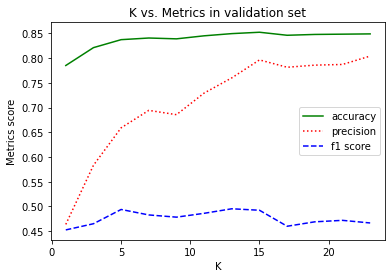

In [22]:
# Plotting K-nn metrics from validation tests

# show accuracy by k
plt.plot(knn_results.k, knn_results.accuracy, linestyle='-', c='green', label = "accuracy")
plt.plot(knn_results.k, knn_results.precision, linestyle=':', c='red', label = "precision")
plt.plot(knn_results.k, knn_results['f1_score'], linestyle='--', c='blue', label = "f1 score")
plt.legend()
plt.title('K vs. Metrics in validation set')
plt.xlabel('K')
plt.ylabel('Metrics score')

In [24]:
# random forest

# Train a classifier for different values of n_estimators
rf_results = []
for x in range(100, 1001, 100):
    rf = RandomForestClassifier(n_estimators = x, random_state = 1).fit(trainX, trainy)
    rf_results.append({'n_estimators': x, 'accuracy': accuracy_score(validy, rf.predict(validX)), 
                      'precision': precision_score(validy, rf.predict(validX)),
                      'f1_score': f1_score(validy, rf.predict(validX))})

    
# Convert results to a pandas data frame
rf_results = pd.DataFrame(rf_results)

Text(0, 0.5, 'Metrics score')

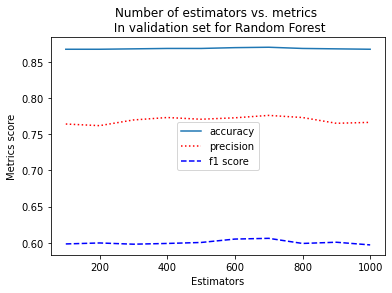

In [31]:
# show accuracy by estimators
plt.plot(rf_results['n_estimators'], rf_results.accuracy, linestyle='-', label = "accuracy")
plt.plot(rf_results['n_estimators'], rf_results.precision, linestyle=':', c='red', label = "precision")
plt.plot(rf_results['n_estimators'], rf_results['f1_score'], linestyle='--', c='blue', label = "f1 score")
plt.title('Number of estimators vs. metrics \n In validation set for Random Forest')
plt.legend()
plt.xlabel('Estimators')
plt.ylabel('Metrics score')

In [34]:
# decision tree

dt_results = []
criterion = ["gini", "entropy", "log_loss"]

for x in criterion:
    dt = DecisionTreeClassifier(criterion = x, random_state = 1).fit(trainX, trainy)
    dt_results.append({'criterion': x, 'accuracy': accuracy_score(validy, dt.predict(validX)), 
                      'precision': precision_score(validy, dt.predict(validX)),
                      'f1_score': f1_score(validy, dt.predict(validX))})
    

# Convert results to a pandas data frame
dt_results = pd.DataFrame(dt_results)


In [35]:
dt_results

,criterion,accuracy,precision,f1_score
0,gini,0.775556,0.447236,0.468421
1,entropy,0.801111,0.505181,0.521390
2,log_loss,0.801111,0.505181,0.521390


In [38]:
dt_results_depth = []

for x in range(2, 30, 2):
    dt = DecisionTreeClassifier(max_depth = x, criterion = "entropy", random_state = 1).fit(trainX, trainy)
    dt_results_depth.append({'max_depth': x, 'accuracy': accuracy_score(validy, dt.predict(validX)), 
                      'precision': precision_score(validy, dt.predict(validX)),
                      'f1_score': f1_score(validy, dt.predict(validX))})
dt_results_depth = pd.DataFrame(dt_results_depth)

In [39]:
dt_results_depth

,max_depth,accuracy,precision,f1_score
0,2,0.808889,0.523684,0.536388
1,4,0.847778,0.711538,0.519298
2,6,0.850000,0.665468,0.578125
3,8,0.850000,0.681102,0.561688
4,10,0.836111,0.615120,0.548239
5,12,0.825556,0.575949,0.536873
6,14,0.815556,0.545181,0.521614
7,16,0.811667,0.531507,0.533700
8,18,0.805556,0.516304,0.520548
9,20,0.800000,0.502604,0.517426


Text(0, 0.5, 'Metrics score')

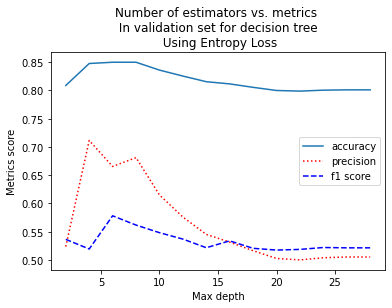

In [40]:
# show accuracy by depth
plt.plot(dt_results_depth['max_depth'], dt_results_depth.accuracy, linestyle='-', label = "accuracy")
plt.plot(dt_results_depth['max_depth'], dt_results_depth.precision, linestyle=':', c='red', label = "precision")
plt.plot(dt_results_depth['max_depth'], dt_results_depth['f1_score'], linestyle='--', c='blue', label = "f1 score")
plt.title('Number of estimators vs. metrics \n In validation set for decision tree \n Using Entropy Loss')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Metrics score')